<a id='top'></a>

# Homework 6: Bootstrapping, Hypothesis Testing, P-Hacking, and Simple Linear Regression 
***

**Name**: 

***

This assignment is due on Moodle by **5 PM on Friday July 13**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

---
[Back to top](#top)
<a id='p1'></a>

### [12 points] Problem 1 - Hypothesis Testing Whether your Co-worker is a Doofus

You are working as a Data Scientist for an internet company. Your co-worker, Daley Jennanigans, is a lovable scamp! Unfortunately, Daley also makes a lot of mistakes throughout the day as the two of you team up to tackle some inference work regarding your company's customers. In each case, clearly explain why Daley's hypothesis testing setup or conclusion is incorrect.

**Part A**: Daley has some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the proportion of last month's website visitors that bought something.  Let $X$ be the random variable describing the number of website visitors who bought something in the previous month, and suppose that the population proportion of visitors who bought something is $p$. Daley is particularly interested to see if the data suggests that more than 10% of website visitors actually buy something.  He decides to perform the test with a null hypothesis of $H_0: \hat{p} = 0.10$. 

**Solution: Part A**

The null hypothesis here is making an assertion about ${\hat p}$, which is an estimation of the actual proportion, p, based on the sample you have. The null and alternative hypotheses are statements about exact variables describing the population, not about variables describing the sample. ${\hat p}$ will be compared to the hypothesized population p.

**Part B**: Daley decides instead to do his hypothesis test with a null hypothesis of $H_0: p < 0.10$.  

**Solution: Part B**

This is a one-sided test to check if p is greater than 0.10, so the null hypothesis should be the case where there is no difference between p and the value we are checking against, 0.10, i.e., p = 0.10. The null hypothesis he proposes here does not even include p = 0.10. p < 0.10 is a range of continuous values. We would be left without a fixed p used to describe the distribution of p values for our null hypothesis, which we would need to find the probability that our ${\hat p}$ would occur if the null hypothesis were true. 


**Part C**: Finally on track with reasonable hypotheses of $H_0: p = 0.10$ and $H_1: p > 0.10$, Daley computes a normalized test-statistic of $z = -1.4$ for the sample proportion and concludes that since $z = -1.4 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ (95%) significance level that the proportion of customers who buy something is less than 10%.

**Solution: Part C**

The z value just tells you how many standard deviations away from the mean of the distribution your test value is, it does not, without interpretation, directly tell you the proportion of the distribution that you would see at this or a more extreme (farther from 0) z value. The p-value at this z is roughly 0.08 which is greater than 0.05. Also, the hypothesis is a right-tailed test, so the rejection region is to the right of the mean, so sufficiently positive z dependent on $\alpha$. For the hypothesis set-up as is, you would fail to reject the null with a test-statistic that is a negative z value. 

**Part D**: Daley is again conducting the hypothesis test of $H_0: p = 0.10$ and $H_1: p > 0.10$. He computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

**Solution: Part D**

The p-value reports the probability of seeing the test-statistic (or more extreme) if the null-hypothesis were true. So in this case, you would expect to see your sample proportion or larger with probability 0.03 if the null hypothesis were true. 

---
[Back to top](#top)
<a id='p2'></a>

### [20 points] Problem 2 - Evaluating Pizza Delivery Performance 

The manager of a pizza chain with multiple locations likes to keep meticulous data on his pizza deliveries.  The data from more than 1200 deliveries in May 2014 is stored in [`pizza.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jja0n7mvrrc671). 

In [2]:
dfP = pd.read_csv("https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jja0n7mvrrc671")
dfP.head()

,day,date,time,operator,branch,driver,temperature,bill,pizzas
0,Thursday,1-May-14,33.708636,Laura,East,Bruno,71.433084,58.4,4
1,Thursday,1-May-14,29.382070,Melissa,East,Salvatore,64.952920,26.4,3
2,Thursday,1-May-14,33.580664,Melissa,West,Salvatore,49.113452,58.1,3
3,Thursday,1-May-14,32.505369,Melissa,East,Salvatore,64.872559,35.2,3
4,Thursday,1-May-14,25.493613,Melissa,West,Salvatore,59.630052,38.4,2


**Part A**: The manager's goal is to have an average delivery time across all branches of less than 30 minutes.  Perform an appropriate hypothesis test at the $\alpha=0.05$ significance level to evaluate whether this goal has been achieved.  Be sure to clearly state your null and alternate hypotheses, describe your testing procedure, and show all calculations in Python. 

**Solution: Part A**

let T = time taken for a pizza delivery

$H_0: \mu = 30 $ and $H_1: \mu < 30$

Will calculate the standardized test-statistic as follows:

$ \bar T = $ mean of the sample T values from the data frame above

$\sigma = $ standard deviation of the T values from the data frame above

$ n = $ number of entries in the data frame

From the central limit theorem:

$$ \bar T \sim N\big(\mu, \frac{\sigma^2}n\big) $$

So the standardized test-statistic, z, is given by:

$$ z = \frac{\bar T - \mu}{\sigma/\sqrt n}$$

This will be compared with $z_\alpha$ (computed using a scipy function):

If $z \leq z_\alpha$ then z is in the rejection range and the null hypothesis can be rejected in favor of the alternative hypothesis.


In [3]:
mu = 30 #from null hypothesis

times = dfP['time']
Tbar = np.mean(times)
sigma = np.std(times)
n = len(times)

z = (Tbar - mu )/(sigma/np.sqrt(n))

zalpha = stats.norm.ppf(0.05)
print("z_alpha is {:0.2f}".format(zalpha))
print("z is {:0.2f}".format(z))


z_alpha is -1.64
z is -3.17


So $z < z_\alpha$, thus we reject $H_0$ in favor of $H_1$, in other words the manager already has an average delivery time across all branches of less than 30 minutes at the $\alpha=0.05$ significance level.

**Part B**: The pizza shop has fallen on hard times and is considering closing a branch. The manager knows that the East branch is the lowest performing branch, followed by the West branch, as measured by the the mean number of pizzas per delivery.

In [4]:
for branch in set(dfP["branch"]):
    print("{:6s} branch mean pizzas/delivery = {:0.3f}".format(branch, dfP.loc[dfP["branch"]==branch, "pizzas"].mean()))

West   branch mean pizzas/delivery = 3.207
Centre branch mean pizzas/delivery = 3.368
East   branch mean pizzas/delivery = 2.429


Can the manager conclude that the East branch is performing statistically significantly lower than the other two branches? Can he conclude that the West branch performs significantly worse than the Centre branch? Conduct hypothesis tests to answer these questions. Both of those questions will help him decide whether or not to close the East branch. The stakes are higher when making the decision to close an entire branch of pizza restaurant, so the manager decides to use the $\alpha=0.01$ significance level for these tests. Be sure to clearly describe your hypotheses and methodology, and show any relevant computations in Python. 

**Solution: Part B**

let P = pizzas/delivery for the specific branch

Need to perform two hypothesis tests, one comparing East to Centre and the other comparing East to West. Centre and West will be generalized below as the Other.

$H_0: \mu_{east} - \mu_{other} = 0 $ and $H_1: \mu_{east} - \mu_{other} < 0$

$\mu_{other}$ and $\mu_{east}$ values are calculated above

Will calculate the standardized test-statistic as follows:

$ \bar P_{branch} = $ mean of the sample P values from the data frame above for the respective branch

$\sigma_{branch} = $ standard deviation of the P values from the data frame above for the respective branch

$ n_{branch} = $ number of specific Branch entries in the data frame 

From the central limit theorem:

$$ \bar P_{east} - \bar P_{other} \sim N\big(\mu_{east}- \mu_{other}, \frac{\sigma_{east}^2}{n_{east}}+\frac{\sigma_{other}^2}{n_{other}}\big) $$

So the standardized test-statistic, z, is given by:

$$ z = \frac{\bar P_{east} - \bar P_{other}-0}{\sqrt{\frac{\sigma_{east}^2}{n_{east}}+\frac{\sigma_{other}^2}{n_{other}}}}$$

This will be compared with $z_\alpha$ (computed using a scipy function):

If $z \leq z_\alpha$ then z is in the rejection range and the null hypothesis can be rejected in favor of the alternative hypothesis.


In [5]:
z_alpha = stats.norm.ppf(0.01) #used for both hypothesis tests since they have the same confidence level
muEast = np.mean(dfP.loc[dfP['branch']=='East', 'pizzas']) #used for both tests
sigmaEast = np.std(dfP.loc[dfP['branch']=='East', 'pizzas'])
nEast = len(dfP.loc[dfP['branch']=='East', 'pizzas'])

#calculations: East vs. West Branch

muWest = np.mean(dfP.loc[dfP['branch']=='West', 'pizzas'])
sigmaWest = np.std(dfP.loc[dfP['branch']=='West', 'pizzas'])
nWest = len(dfP.loc[dfP['branch']=='West', 'pizzas'])

z_west = (muEast - muWest )/np.sqrt((sigmaWest**2/(nWest))+sigmaEast**2/(nEast))

#Calculations: East vs. Centre

muCentre = np.mean(dfP.loc[dfP['branch']=='Centre', 'pizzas'])
sigmaCentre = np.std(dfP.loc[dfP['branch']=='Centre', 'pizzas'])
nCentre = len(dfP.loc[dfP['branch']=='Centre', 'pizzas'])

z_centre = (muEast - muCentre )/np.sqrt((sigmaCentre**2/(nCentre))+sigmaEast**2/(nEast))

print("z_alpha is {:0.2f}".format(z_alpha))
print("z_west is {:0.2f}".format(z_west))
print("z_centre is {:0.2f}".format(z_centre))

z_alpha is -2.33
z_west is -8.31
z_centre is -10.19


Since both $z_{other}$ standardized test statistics are well below the $z_\alpha$ and thus within our rejection range, for both the West and Centre branches we can reject the null hypothesis that the east branch performs as well as the other branch in favor of the alternative hypothesis that the east branch performs worse than the other branch (worse when looking at mean pizzas per delivery only).

**Part C**: It has been hypothesized that two of the manager's finest drivers, Mario and Luigi, deliver different numbers of pizzas per delivery. Conduct an appropriate hypothesis test at the $\alpha = 0.05$ significance level to determine if there is any statistically significant difference between the mean number of pizzas per delivery for the two drivers.

**Solution: Part C**

let $ P_{driver} = $pizzas/delivery for a driver

$H_0: \mu_{mario} -\mu_{luigi} = 0 $ and $H_1: \mu_{mario} - \mu_{luigi} \neq 0$

A standardized test statistic will be calculated as before, except in this case, it is a two-tailed test so there will be two $z_\alpha$ values, one for the edge of each rejection region (will call these $z_{upper}$ and $z_{lower}$). The probability density within each tail rejection region will sum to the given $\alpha$

$ \bar P_{driver} = $ mean of the sample P values for the given driver

$\sigma_{driver} = $ standard deviation of of pizza/delivery for respective driver

$ n_{driver} = $ number of pizza/delivery for respective driver entries in the data frame 

So the standardized test-statistic, z, is given by:

$$ z = \frac{\bar P_{mario} - \bar P_{luigi}-0}{\sqrt{\frac{\sigma_{mario}^2}{n_{mario}}+\frac{\sigma_{luigi}^2}{n_{luigi}}}}$$

This will be compared with $z_{upper}$ and $z_{lower}$ (computed using a scipy function):

$z_{lower} = z_{\alpha/2} = -z_{upper}$

If $z \leq z_{lower}$ or $z \geq z_{upper}$ then z is in the rejection region and the null hypothesis can be rejected in favor of the alternative hypothesis.

In [6]:
z_lower = stats.norm.ppf(0.05/2)
z_upper = - z_lower

Pluigi = np.mean(dfP.loc[dfP['driver']=='Luigi', 'pizzas'])
sigmaLuigi = np.std(dfP.loc[dfP['driver']=='Luigi', 'pizzas'])
nLuigi = len(dfP.loc[dfP['driver']=='Luigi', 'pizzas'])
Pmario = np.mean(dfP.loc[dfP['driver']=='Mario', 'pizzas'])
sigmaMario = np.std(dfP.loc[dfP['driver']=='Mario', 'pizzas'])
nMario = len(dfP.loc[dfP['driver']=='Mario', 'pizzas'])

z = (Pmario - Pluigi )/np.sqrt(sigmaMario**2/nMario + sigmaLuigi**2/nLuigi)

print("z_lower is {:0.2f}".format(z_lower))
print("z_upper is {:0.2f}".format(z_upper))
print("z is {:0.2f}".format(z))



z_lower is -1.96
z_upper is 1.96
z is 1.68


At the $\alpha = 0.05$ significance level, there is not a statistically significant difference between Mario and Luigi. According to the results above, since $z_{lower}< z < z_{upper}$, so z is not in either rejection region, thus the null hypothesis that they have the same pizzas/delivery cannot be rejected.

---
[Back to top](#top)
<a id='p3'></a>

### [20 points] Problem 3 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so I think. Let's find out, in this exciting homework problem!

One recent study investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 95% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Do all computations in Python, and report the results.  Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?

**Solution: Part A**

Each confidence interval will be computed as follows:

$$CI = \bar X \pm t \frac{s}{\sqrt n}$$

$\bar X $ = the mean given above

$ s = $ the corresponding standard deviation



In [7]:
def CIcalc(Xbar, s, n, t):
    return (Xbar - t*s/np.sqrt(n), Xbar + t*s/np.sqrt(n))

t = stats.t.ppf(0.975, df = 9) #same t score will be used for all three CI's

#Coffee + Nap 
CIcofnap = CIcalc(451.3, 31.9, 10, t)

#Coffee
CIcof = CIcalc(494.2, 39.6, 10, t)

#Nap
CInap = CIcalc(492.8, 45.2, 10, t)

print("The 95% t-confidence interval for the reaction time of the Coffee+Nap Group: [{:.2f}, {:.2f}] ".format(CIcofnap[0],CIcofnap[1]))
print("The 95% t-confidence interval for the reaction time of the Coffee Group: [{:.2f}, {:.2f}] ".format(CIcof[0],CIcof[1]))
print("The 95% t-confidence interval for the reaction time of the Nap Group: [{:.2f}, {:.2f}] ".format(CInap[0],CInap[1]))

The 95% t-confidence interval for the reaction time of the Coffee+Nap Group: [428.48, 474.12] 
The 95% t-confidence interval for the reaction time of the Coffee Group: [465.87, 522.53] 
The 95% t-confidence interval for the reaction time of the Nap Group: [460.47, 525.13] 


Since all three CI's overlap each other, we cannot make any conclusions about differences between the true means for the three different groups. 

**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Solution: Part B**

If the nap promotes a faster reaction time then the time should be shorter, so the hypotheses are as follows:

$H_0: \mu_{coffee} - \mu_{nap} = 0 $ and $H_1: \mu_{coffee} - \mu_{nap} > 0 $

let $ X_{condition} = $ be the reaction time in ms for the respective condition

$ \bar X_{condition} = $ mean of the X for the test condition

$\sigma_{condition} = $ standard deviation of X for respective condition

$ n_{condition} = $ sample size for the respective condition

Since the sample sizes are small, will perform a t-test.

$$t = \frac{\bar X_{coffee}-\bar X_{nap}-0}{\sqrt{\frac{\sigma_{coffee}^2}{n_{coffee}}+\frac{\sigma_{nap}^2}{n_{nap}}}}$$

This is a one-sided (right) test, so there will be one $t_{crit}$ at $t_{1-\alpha}$. We will reject the null hypothesis in favor of the alternative hypothesis if $ t \geq  t_{1-\alpha}$

In [8]:
t_1minalpha = stats.t.ppf(1-0.05, df = 9 + 9)

n = 10
XbarCof = 494.2
SigmaCof = 39.6
XbarNap = 492.8
SigmaNap = 45.2

t = (XbarCof-XbarNap)/np.sqrt(SigmaCof**2/n+SigmaNap**2/n)

print("t_1minalpha is {:0.2f}".format(t_1minalpha))
print("t is {:0.2f}".format(t))

t_1minalpha is 1.73
t is 0.07


Since $ t < t_{1-\alpha} $ we cannot reject the null hypothesis and we cannot conclude that a nap improves reaction time relative to coffee. 

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Solution: Part C**

If the coffee+nap promotes a faster reaction time then the time should be shorter, so the hypotheses are as follows (subscript other represents the other condition being tested against):

$H_0: \mu_{other} - \mu_{coffee+nap} = 0 $ and $H_1: \mu_{other} - \mu_{coffee+nap} > 0 $

let $ X_{condition} = $ be the reaction time in ms for the respective condition

$ \bar X_{condition} = $ mean of the X for the test condition

$\sigma_{condition} = $ standard deviation of X for respective condition

$ n_{condition} = $ sample size for the respective condition

Since the sample sizes are small, will perform a t-test.

$$t_{other} = \frac{\bar X_{other}-\bar X_{coffee+nap}-0}{\sqrt{\frac{\sigma_{other}^2}{n_{other}}+\frac{\sigma_{coffee+nap}^2}{n_{coffee+nap}}}}$$

This is a one-sided (right) test, so there will be one $t_{crit}$ at $t_{1-\alpha}$. If $t > t_{1-\alpha}$ then we can reject the null hypothesis in favor of the alternative hypothesis.

In [9]:
#can use values from above, just need coffee+nap variables

XbarCN = 451.3
SigmaCN = 31.9

t_nap = (XbarNap-XbarCN)/np.sqrt(SigmaCN**2/n+SigmaNap**2/n)
t_cof = (XbarCof-XbarCN)/np.sqrt(SigmaCof**2/n+SigmaCN**2/n)

print("t_1minalpha is {:0.2f}".format(t_1minalpha))
print("t_nap is {:0.2f}".format(t_nap))
print("t_cof is {:0.2f}".format(t_cof))

t_1minalpha is 1.73
t_nap is 2.37
t_cof is 2.67


The standardized TS, t_nap and t_cof, are both well above the t_crit, so for both comparison we can reject the null hypothesis in favor of the alternative hypothesis that the coffee+nap condition improves reaction time relative to the coffee or nap alone. 

**Part D**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

**Solution: Part D**

The sampling distribution of the variance (and thus standard deviation) is a chi-squared distribution, not a normal, so we will have to calculate the CI as follows:

$$ CI = \bigg[\sqrt{\frac{(n-1)s^2}{\chi_{\frac{\alpha}2, n-1}^2}}, \sqrt{\frac{(n-1)s^2}{\chi_{1-\frac{\alpha}2, n-1}^2}}     \bigg]$$

s and n are given above.

In [10]:
alpha = 0.05
lowChi = stats.chi2.ppf(alpha/2, n-1)
highChi = stats.chi2.ppf(1-alpha/2, n-1)

CI = (np.sqrt((n-1)*SigmaCN**2/lowChi), np.sqrt((n-1)*SigmaCN**2/highChi))

print("The 95% CI for the standard deviation of reaction time for the Coffee+Nap Group: [{:.2f}, {:.2f}] ".format(CI[1],CI[0]))

The 95% CI for the standard deviation of reaction time for the Coffee+Nap Group: [21.94, 58.24] 


---
[Back to top](#top)
<a id='p4'></a>

### [15 points] Problem 4 - Bad Science for Fun and Profit 

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Johnny Nefarious has landed his first data science internship at an online marketing firm.  His primary summer project has been to design and test a new email advertisement for his company's best-selling product. To test his advertisement his supervisors have allowed him to send his ad to 4 targeted customer groups of 50 people every day for a month, and keep track of which email client (Outlook or Gmail) the customers use.

The effectiveness of online advertising is typically measured by the ad's [click-through rate](https://en.wikipedia.org/wiki/Click-through_rate) (CTR), which is defined to be the _proportion_ of users that click on an advertisement. The company's standard email advertisement has a CTR of $0.05$.  Johnny is hoping to land a permanent position at the company when he graduates, so he's **really** motivated to show his supervisors that the CTR of his email advertisement is a (statistically) significant improvement over their previous ad. 

The data from Johnny's summer experiment can be found in [`email.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jja0n7qay9y674). Load this dataset into Pandas. 

In [11]:
dfAd = pd.read_csv("https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jja0n7qay9y674")
dfAd.head()

,Group,Client,Sent,Clicked
0,1,Gmail,50,4
1,1,Gmail,50,3
2,1,Gmail,50,1
3,1,Outlook,50,4
4,1,Gmail,50,3


**Part A**: State the null and alternate hypotheses that Johnny should test to see if his ad campaign is an improvement over the company's standard mailer with a CTR of $0.05$. 

**Solution: Part A**

$H_0: p = 0.05 $ and $H_1: p > 0.05 $



**Part B**: Test the hypothesis from **Part A** at the $\alpha = 0.05$ significance level using a p-value test. Is there sufficient evidence for Johnny to conclude that his ad campaign is an improvement?   

**Solution: Part B**

We can perform a z-test since $n \geq 30$. We will compare our TS, z, to $z_{1-\alpha}$, if $ z \geq z_{1-\alpha}$ then we can reject the null hypothesis in favor of the alternative hypothesis. 

$$z = \frac{\hat p - p}{\sqrt{\frac{p(1-p)}{n}}}$$

Where $\hat p$ is our observed proportion.

In [12]:
p = 0.05
n = len(dfAd)
phat = dfAd['Clicked']/dfAd['Sent']
z = (np.mean(phat)-p)/np.sqrt((p*(1-p))/n)
z_alpha = stats.norm.ppf(1-0.05)
print("z_1minalpha is {:0.2f}".format(z_alpha))
print("z is {:0.2f}".format(z))

z_1minalpha is 1.64
z is 0.07


Since $z<z_{1-\alpha}$ we cannot reject the null hypothesis and conclude that Johnny's ad was statistically signifcantly better than the company's standard.

**Part C**: "Aw, shucks!", Johnny thinks. This is the part where he decides to resort to some questionable science.  Maybe there is a reasonable subset of the data for which his alternative hypothesis is supported?  Can he find it?  Can he come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Johnny cannot modify the original data (e.g. by adding nonexistent clicks to certain groups) because his boss will surely notice.  Instead he needs to find a subset of the data for which his hypothesis is supported by a p-value test at the $\alpha = 0.05$ significance level _and_ be able to explain to his supervisors why his sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation.  

**Solution: Part C**

Will test different subsets (z or t-test depending on whether the subset size is < 30) to see if any reasonable division of the data results in a statistically significant result. The subsets tested were created based on:

1) Group number

2) Client type

3) Group number and Client Type

4) Day of the week the email was sent 

In [13]:
def pValTest(subset, proportion, pval): #function to check sample size and picks a t test if <30, z test otherwise
    if len(subset) < 30:
        return rightTtestProp(subset, proportion, pval)
    return rightZtestProp(subset, proportion, pval)

def rightZtestProp(subset, p, alpha):
    z = (np.mean(subset)-p)/np.sqrt((p*(1-p))/len(subset))
    pval = stats.norm.cdf(z)
    return (round(np.mean(subset), 2),round(1- pval,2),(1- pval) <= alpha)

def rightTtestProp(subset, p, alpha):
    t = (np.mean(subset)-p)/np.sqrt((p*(1-p))/len(subset))
    pval = stats.t.cdf(t, df = len(subset)-1)
    return (round(np.mean(subset), 2),round(1- pval, 2),(1- pval) <= alpha)

#initialize the standard CTR, p, and the significance level, alpha
p = 0.05
alpha = 0.05

#get subset types from the additional columns Group and Client
groups = set(dfAd['Group'])
clients = set(dfAd['Client'])

#p-val tests looking at groups or clients individually 

#Groups
groupResults = {}
for group in groups:
    subset = dfAd.loc[dfAd['Group']==group, 'Clicked']/dfAd.loc[dfAd['Group']==group, 'Sent']
    groupResults[group] = pValTest(subset, p, alpha)

#check if group divided subsets succeeded 
groupSuccess = False

for result in groupResults:
    if groupResults[result][-1]:
        groupSuccess = True
    
#Clients
clientResults = {}
for client in clients:
    subset = dfAd.loc[dfAd['Client']==client, 'Clicked']/dfAd.loc[dfAd['Client']==client, 'Sent']
    clientResults[client] = pValTest(subset, p, alpha)
    
#check if client divided subsets succeeded 
clientSuccess = False

for result in clientResults:
    if clientResults[result][-1]:
        clientSuccess = True
    
#all combinations of clients and groups
groupClientResults = {}
for group in groups:
    groupSub = dfAd.loc[dfAd['Group']==group]
    for client in clients:
        subset = groupSub.loc[groupSub['Client']==client, 'Clicked']/groupSub.loc[groupSub['Client']==client, 'Sent']
        groupClientResults[(group,  client)] = pValTest(subset, p, alpha)

#check if client/group divided subsets succeeded 
groupClientSuccess = False

for result in groupClientResults:
    if groupClientResults[result][-1]:
        groupClientSuccess = True
        
#by day of week
dayOfWkResults = {}
dfAd['Weekday'] = (dfAd.index % 30)%7
for i in range(7):
    subset = dfAd.loc[dfAd['Weekday']==i, 'Clicked']/dfAd.loc[dfAd['Weekday']==i, 'Sent']
    dayOfWkResults[i] = pValTest(subset, p, alpha)

#check if day of week divided subsets succeeded 
daySuccess = False

for result in dayOfWkResults:
    if dayOfWkResults[result][-1]:
        daySuccess = True
        
anySuccessAnywhere = daySuccess + groupClientSuccess + clientSuccess + groupSuccess

print("The number of subset division types that resulted in at least one successful subset is "+str(anySuccessAnywhere))        


The number of subset division types that resulted in at least one successful subset is 0


After testing all these different subset types, I figured nothing this straightforward would work since his results are obviously not significantly different than the standard CTR. Just to check that this approach is futile, I tested below idealized subsets that exclude the lowest click number iteratively since that would be your best case subset. 

In [14]:
#iteratively build subsets by excluding the lowest clicked values
clicks = set(dfAd['Clicked'])
clickResults = {}
for i in clicks:
    subset = dfAd.loc[dfAd['Clicked']>i, 'Clicked']/dfAd.loc[dfAd['Clicked']>i, 'Sent']
    if len(subset) > 0:
        clickResults[i] = pValTest(subset, p, alpha)

#check if lowest click(s) excluded subsets succeeded 
clickSuccess = False

for result in clickResults:
    if clickResults[result][-1]:
        clickSuccess = True
        
if clickSuccess:
    print("Excluding lowest clicks worked! There's a glimmer of hope!")
else:
    print("Excluding the lowest clicks did not work, he should give up, but he won't! Integrity? Who needs it? Not this guy.")

Excluding the lowest clicks did not work, he should give up, but he won't! Integrity? Who needs it? Not this guy.


Could try bootstrapping some of the subset types above that result in subsets smaller than 30 and have $\hat p > 0.05$. For these subsets we can argue that we don't know if at that small sample size the distribution is normal. Basically, I will go through and pick out the minimum number of bootstrapped samples needed to result in a statistically significant result. This is super wrong. 

In [15]:
#Bootstrapping to get the result we want
def bootStrapYeeHaw(subset, p, alpha): #bootstrap to generate large list of means from the bootstrapped samples, use this list to perform pval test
    bootSizes = np.arange(500, 20000, 500)
    num_boots = 0
    for x in bootSizes:
        num_boots = x
        newSubset = np.array([np.mean(np.random.choice(subset, replace=True, size=len(subset))) for ii in range(num_boots)])
        newResults = pValTest(newSubset, p, alpha)
        if newResults[-1]: #if null can be rejected, end loop
            return newResults, num_boots
        num_boots = num_boots*2 #else repeat loop with more re-samplings
    return newResults, num_boots

#Groups
groupResults = {}
for group in groups:
    subset = np.array(dfAd.loc[dfAd['Group']==group, 'Clicked']/dfAd.loc[dfAd['Group']==group, 'Sent'])
    currResult = pValTest(subset, p, alpha)
    if currResult[1] > p and len(subset) < 30:
        groupResults[group] = bootStrapYeeHaw(subset, p, alpha)


    
#Clients
clientResults = {}
for client in clients:
    subset = np.array(dfAd.loc[dfAd['Client']==client, 'Clicked']/dfAd.loc[dfAd['Client']==client, 'Sent'])
    currResult = pValTest(subset, p, alpha)
    if currResult[1] > p and len(subset) < 30:
        clientResults[client] = bootStrapYeeHaw(subset, p, alpha)
    

    
#all combinations of clients and groups
groupClientResults = {}
for group in groups:
    groupSub = dfAd.loc[dfAd['Group']==group]
    for client in clients:
        subset = groupSub.loc[groupSub['Client']==client, 'Clicked']/groupSub.loc[groupSub['Client']==client, 'Sent']
        currResult = pValTest(subset, p, alpha)
        if currResult[1] > p and len(subset) < 30:
            groupClientResults[(group,  client)] = bootStrapYeeHaw(subset, p, alpha)

        
#by day of week
dayOfWkResults = {}
dfAd['Weekday'] = (dfAd.index % 30)%7
for i in range(7):
    subset = dfAd.loc[dfAd['Weekday']==i, 'Clicked']/dfAd.loc[dfAd['Weekday']==i, 'Sent']
    currResult = pValTest(subset, p, alpha)
    if currResult[1] > p and len(subset) < 30:
        dayOfWkResults[i] = bootStrapYeeHaw(subset, p, alpha)
print(groupResults)
print(clientResults)
print(groupClientResults)
print(dayOfWkResults)

{}
{}
{(1, 'Outlook'): ((0.04, 1.0, False), 39000), (1, 'Gmail'): ((0.06, 0.04, True), 3000), (2, 'Outlook'): ((0.04, 1.0, False), 39000), (2, 'Gmail'): ((0.06, 0.03, True), 1000), (3, 'Outlook'): ((0.04, 1.0, False), 39000), (3, 'Gmail'): ((0.06, 0.04, True), 3500), (4, 'Outlook'): ((0.05, 0.05, True), 11500), (4, 'Gmail'): ((0.04, 1.0, False), 39000)}
{0: ((0.06, 0.04, True), 1000), 1: ((0.05, 0.28, False), 39000), 2: ((0.05, 0.21, False), 39000), 3: ((0.05, 0.95, False), 39000), 4: ((0.05, 0.5, False), 39000), 5: ((0.04, 1.0, False), 39000), 6: ((0.05, 0.19, False), 39000)}


In [16]:
print("The successful subsets are: ")
print()
print("Groups: ")
for result in groupResults:
    if groupResults[result][0][-1]:
        print("Group number: ", result)
        print("Number of resamplings: ", groupResults[result][1])
print()

print("Client: ")
for result in clientResults:
    if clientResults[result][0][-1]:
        print("Client: ", result)
        print("Number of resamplings: ", clientResults[result][1])
        
print()

print("Group, Client: ")
for result in groupClientResults:
    if groupClientResults[result][0][-1]:
        print("Group, Client: ", result)
        print("Number of resamplings: ", groupClientResults[result][1])

print() 
print("Day of Week: ")
for result in dayOfWkResults:
    if dayOfWkResults[result][0][-1]:
        print("Day of month mod 7: ", result)
        print("Number of resamplings: ", dayOfWkResults[result][1])


The successful subsets are: 

Groups: 

Client: 

Group, Client: 
Group, Client:  (1, 'Gmail')
Number of resamplings:  3000
Group, Client:  (2, 'Gmail')
Number of resamplings:  1000
Group, Client:  (3, 'Gmail')
Number of resamplings:  3500
Group, Client:  (4, 'Outlook')
Number of resamplings:  11500

Day of Week: 
Day of month mod 7:  0
Number of resamplings:  1000


So for each of my subset types, except the client/group subsets since the sample sizes are large enough for the CLT to apply thus I can't argue that the distribution might be non-normal, I was able to find certain subsets that could be bootstrapped until statistically significant results were produced. Johnny could take the group/client subsets and argue that his company may not care about outlook users (perhaps they are an older demographic or something), and that group 4 may not be as good as the other 3 for some reason, and so just looking at groups 1-3 and gmail users, his results are statistically significantly better than the standard CTR.  

---
[Back to top](#top)
<a id='p5'></a>

### [15 points] Problem 5 - Simple Linear Regression for the Consumption of Ice Cream Treats

The data in [`icecream.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jja0n80849467a) contains information on a particular runner's ice cream eaten (in scoops) and miles run on particular days over the past year. In this exercise you will construct a simple linear regression model for the response variable "amount of ice cream consumed" (`scoops`), using "number of miles run" (`miles`) as the feature. Load the data into a Pandas DataFrame.

In [17]:
dfTreats = pd.read_csv("https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jja0n80849467a")
dfTreats.head()

,miles,scoops
0,14.300531,8.922252
1,9.361511,4.720254
2,13.929330,8.567314
3,12.673436,8.855122
4,16.055107,9.409772


**Part A**: Perform a simple linear regression with `miles` as the feature and `scoops` as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

**Solution: Part A**

$$\hat\beta = \frac{\sum_{i = 1}^{n}(x_i - \bar x)(y_i - \bar y)}{\sum_{i = 1}^{n}(x_i - \bar x)^2}$$

$$\hat\alpha = \bar y - \hat\beta\bar x$$


In [18]:
def regression(x,y):
    xbar = x.mean()
    ybar = y.mean()
    numerator = np.array((x-xbar)*(y-ybar)).sum()
    denominator = np.array((x-xbar)*(x-xbar)).sum()
    betaHat = numerator/denominator
    alphaHat = ybar - betaHat*xbar
    return alphaHat, betaHat

estRegression = regression(dfTreats['miles'],dfTreats['scoops'])

print(" y = {:0.2f} + {:0.2f}x".format(estRegression[0], estRegression[1]))


 y = 2.88 + 0.42x


**Part B**: Make a scatter-plot of the data with `miles` as the feature and `scoops` as the response, and overlay the estimated regression line.  Clearly label all relevant plot elements and include a legend.

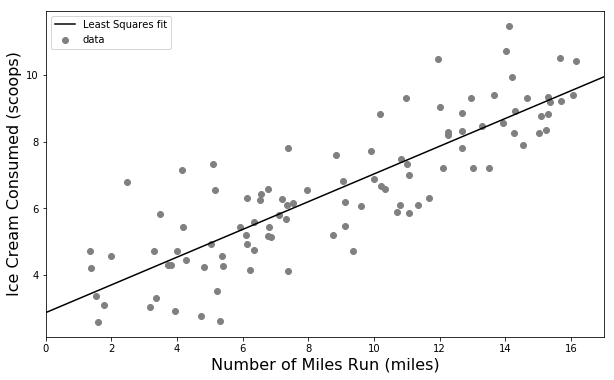

In [19]:
#Solution Part B
fig, ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(dfTreats['miles'],dfTreats['scoops'],color='gray',marker='o',label="data")
xValues = np.linspace(0,17,10000)
yhat = estRegression[0] + estRegression[1]*xValues
line = ax.plot(xValues,yhat,color='black',label="Least Squares fit")

ax.set_xlabel("Number of Miles Run (miles)", fontsize=16)
ax.set_ylabel("Ice Cream Consumed (scoops)", fontsize=16)

ax.set_xlim([0,17])
plt.legend(loc = 2);

**Part C**: Give a physical interpretation of the coefficients $\hat{\alpha}$ and $\hat{\beta}$, estimated from your model. Is the relationship between run lengths and ice cream consumption positive or negative? Fully justify your responses.

**Solution: Part C**

$\hat\alpha$ is how much ice cream a runner would eat when they haven't run at all (so number of miles run = 0)

$\hat\beta$ is how many more scoops of ice cream a runner will eat for additional distance run (in miles)

The sign of $\hat\beta$ tells you the relationship between the feature and the response variable. If they are positively correlated $\hat\beta > 0 $ since the response variable, in this case amount of ice cream consumed, will increase as the feature, miles run, increases (and they will decrease together as well).$\hat\beta < 0 $ means they are negatively correlated since an increase in one corresponds to a decrease in the other, and vice versa.$\hat\beta = 0 $ means the two are not related. In our case, $\hat\beta > 0 $ so ice cream consumed and miles run are positively related. 


**Part D**: How much ice cream does your simple linear regression model predict the runner will consume if they run a marathon (26.2 miles)? What are potential drawbacks to this model for ice cream consumption?

In [20]:
#Solution Part D

x = 26.2

y = estRegression[0] + estRegression[1]*x

print("Ice cream consumed after running 26.2 miles is approximately {:0.2f} scoops".format(y))

Ice cream consumed after running 26.2 miles is approximately 13.77 scoops


One drawback is that this model can be extrapolated to distances that humans would be incapable of running in one day and return an ice cream value for any distance up to infinity. There is also an upper bound on the amount of ice cream a person could even consume, however this model would allow the number of scoops to reach infinity as well. The model could also allow for a negative intercept value depending on the data, even though you can't eat negative amounts of something. Another drawback, is that the model only considers distance run, when other features may play a role in how much ice cream a runner eats. 

**Part E**: Are there any other features you think should be added to the model, making this a *multiple* linear regression model?

You could add in the temperature during the day as another feature, which would probably also be positively correlated. You could also include something like average calories consumed per day for the runners, since a runner who generally eats more (due to body size, activity level, etc.) would probably be able to eat more ice cream than one who eats less. Another feature could be some measure of how much a given runner even likes ice cream. 

---
[Back to top](#top)
<a id='p6'></a>

### [15 points] Problem 6 - "Central Limit-ish Theorem" for the Log-normal Distribution

The log-normal distribution arises in many applications, such as (but not limited to!) modeling the distribution of extreme values like monthly rainfall, modeling the distribution of income for the bulk of the population, and the length of some board games. It is useful, but can be a little tough to wrap your head around at first. There is a "logarithm" right in the name, after all. So let's tame this beast.

Execute the code below to obtain a sample of 10,000 random draws from a [log-normal distribution](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.lognormal.html) with parameters $\mu = 3$ and $\sigma = 0.25$.

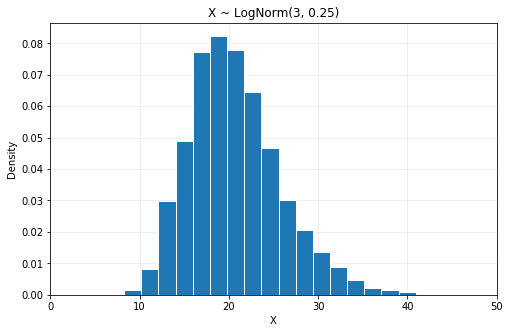

In [21]:
sigma = 0.25
mu = 3
n = 10000
x = pd.Series(np.random.lognormal(mean=mu, sigma=sigma, size=n))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
x.hist(ax=ax, edgecolor="white", bins=20, density=True)
ax.set_xlim([0,50])
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.set_title('X ~ LogNorm({}, {})'.format(mu,sigma))
ax.set_axisbelow(True)
ax.grid(alpha=0.25);

**Part A**: Recall that the log-normal pdf for a random variable $X$ is given by
$$f(x \mid \mu, \sigma) = \dfrac{1}{x\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{\log{x} - \mu}{\sigma}\right)^2}$$

Thus, if you have a random variable $X \sim LogNorm(\mu, \sigma)$, the transformed random variable $Y = \log(X)$ must have $Y \sim N(\mu, \sigma^2)$. Verify this by plotting a density histogram of $Y = \log(X)$, along with the normal pdf $f(y \mid \mu, \sigma^2)$. Be sure to label everything in your _single-panel_ figure and include a legend. Write 1-2 sentences commenting on the agreement.

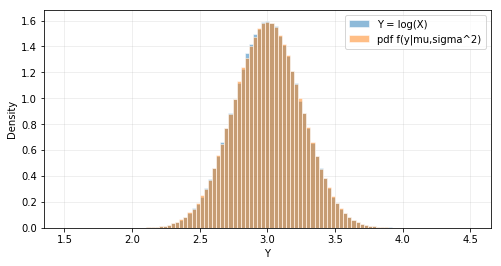

In [22]:
num_samples = 500000
Logx = pd.Series(np.log(np.random.lognormal(mean=mu, sigma=sigma, size=num_samples)))
pdf = pd.Series(np.random.normal(mu, sigma, size=num_samples))
my_bins = np.linspace(1.5, 4.5, 100)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
Logx.hist(alpha=0.5, bins = my_bins,edgecolor="white", label="Y = log(X)", density=True)
pdf.hist(alpha=0.5, bins = my_bins, edgecolor="white", label="pdf f(y|mu,sigma^2)", density=True)
ax.set_xlabel('Y')
ax.set_ylabel('Density')
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.legend()
plt.show();

The overlayed histograms look identical, so $log(X)$ is normally distributed for the random variable X that has a log-normal distribution. 

**Part B**: Now, read in the file [`lognorm.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jja0n7bg98m66x), available linked here and on Piazza. These are 25 samples from a log-normal distribution with unknown parameters $\mu$ and $\sigma$. Use bootstrapping with at least 1,000 re-sampling iterations to obtain 95% confidence intervals for each of the median and the parameter $\mu$ of the unknown log-normal distribution from which these data originate. Note that the two are related by $\tilde{x} = e^{\mu}$, so the two confidence intervals are related.

In [23]:
dfLN = pd.read_csv("https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jja0n7bg98m66x", header = None)
dfLN.head()

,0
0,10.676829
1,12.436454
2,13.765776
3,14.930567
4,9.339963


In [24]:
logX = np.log(dfLN)
logX.head()
num_boots = 1000
mu = np.array([np.mean(np.random.choice(logX[0], replace=True, size=len(logX))) for ii in range(num_boots)])
L, U = np.percentile(mu, 2.5), np.percentile(mu, 97.5)
CImu = np.array([L, U])
CImed = np.e**CImu
print("The 95% CI for mu is: ", CImu)

print("The 95% CI for the median is: ", CImed)

The 95% CI for mu is:  [2.44008414 2.60491952]
The 95% CI for the median is:  [11.47400613 13.5301363 ]


**Part C**: If $Y$ is normally distributed with mean $\mu$ and standard deviation $\sigma$, the Central Limit Theorem and what is commonly known as the ["68-95-99.7 Rule"](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) suggest that:
* 68.3% of the data for $Y$ fall within the interval $[\mu - \sigma, \mu + \sigma]$
* 95.4% of the data fall within the interval $[\mu - 2\sigma, \mu + 2\sigma]$
* 99.7% of the data fall within the interval $[\mu - 3\sigma, \mu + 3\sigma]$

If we have $X \sim LogNorm(\mu, \sigma)$, then $Y = \log(X) \sim N(\mu, \sigma^2)$ follows this 68-95-99.7 Rule for normal distributions. Since $Y = \log(X)$ is a one-to-one function, we can develop a similar 68-95-99.7 Rule for the log-normal distribution. This is just one of many reasons why we love one-to-one functions! Take the 68% part of the rule, for example.

* 68.3% of the data for $Y$ are within $[\mu - \sigma, \mu + \sigma]$.
* This means that 68.3% of the data for $X = e^Y$ are within $\left[ e^{\mu - \sigma}, e^{\mu + \sigma}\right] = \left[ e^{\mu}/e^{\sigma}, ~~ e^{\mu} e^{\sigma}\right]$
* For brevity's sake, we often rewrite $m = e^{\mu}$ and $s = e^{\sigma}$, so that this interval becomes $[m/s, ms]$. Note that $m = \tilde{x}$ is the median.

Formulate a hypothesis regarding the form for the 95 and 99.7% parts of the Rule are for the log-normal distribution. Then, finish the code below to verify that your hypotheses are correct.

**Solution: Part C**

The rest of the rule for the log-normal distribution would be:

* 95.4% of the data fall within the interval $\left[ e^{\mu}/e^{2\sigma}, ~~ e^{\mu} e^{2\sigma}\right]$
* 99.7% of the data fall within the interval $\left[ e^{\mu}/e^{3\sigma}, ~~ e^{\mu} e^{3\sigma}\right]$

In [25]:
sigma = 0.25
mu = 3
n = 100000
x = pd.Series(np.random.lognormal(mean=mu, sigma=sigma, size=n))

# Testing 95.4%

#From the data
lower = (100-95.4)/2
L, U = np.percentile(x, lower), np.percentile(x, 100-lower)

#From the Rule
Lrule, Urule = np.e**mu/np.e**(2*sigma), np.e**mu*np.e**(2*sigma)
print("Results from Testing the 95.4% Rule: ")
print("Interval from the data: [", round(L,2),",",round(U,2), "]")
print("Interval from the rule: [", round(Lrule, 2),",", round(Urule, 2),"]\n")

# Testing 99.7%

#From the data
lower = (100-99.7)/2
L, U = np.percentile(x, lower), np.percentile(x, 100-lower)

#From the Rule
Lrule, Urule = np.e**mu/np.e**(3*sigma), np.e**mu*np.e**(3*sigma)

print("Results from Testing the 99.7% Rule: ")
print("Interval from the data: [", round(L,2),",",round(U,2), "]")
print("Interval from the rule: [", round(Lrule, 2),",", round(Urule, 2),"]")

Results from Testing the 95.4% Rule: 
Interval from the data: [ 12.21 , 32.97 ]
Interval from the rule: [ 12.18 , 33.12 ]

Results from Testing the 99.7% Rule: 
Interval from the data: [ 9.56 , 41.72 ]
Interval from the rule: [ 9.49 , 42.52 ]


For 95.4% and 99.7% the two intervals, one from the generated distribution and the other from the proposed rule, are in agreement (within reason, since the percentages we are using are approximations of the actual percentages), so the hypothesized rest of the rule seems valid.